In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Create an evaluate function
def evaluate(y_true, y_hat, label='test'):
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_hat)
    print('{} set RMSE:{}, R2:{}'.format(label, rmse, variance))

# 1. Load Dataset:

In [4]:
# define column names for easy indexing
index_names = ['unit_nr', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = [f'sensor_{i}' for i in range(1,22)] 
col_names = index_names + setting_names + sensor_names

# read data
train = pd.read_csv('train_FD001.txt', sep=r'\s+', header=None, names=col_names)
test = pd.read_csv('test_FD001.txt', sep=r'\s+', header=None, names=col_names)
y_test = pd.read_csv('RUL_FD001.txt', sep=r'\s+', header=None, names=['RUL'])

train.head()

,unit_nr,time_cycles,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


# 2. Basic Dataset Info:

In [6]:
train.tail()

,unit_nr,time_cycles,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640
20630,100,200,-0.0032,-0.0005,100.0,518.67,643.85,1600.38,1432.14,14.62,...,519.30,2388.26,8137.33,8.5036,0.03,396,2388,100.0,38.37,23.0522


In [7]:
train.shape   

(20631, 26)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unit_nr      20631 non-null  int64  
 1   time_cycles  20631 non-null  int64  
 2   setting_1    20631 non-null  float64
 3   setting_2    20631 non-null  float64
 4   setting_3    20631 non-null  float64
 5   sensor_1     20631 non-null  float64
 6   sensor_2     20631 non-null  float64
 7   sensor_3     20631 non-null  float64
 8   sensor_4     20631 non-null  float64
 9   sensor_5     20631 non-null  float64
 10  sensor_6     20631 non-null  float64
 11  sensor_7     20631 non-null  float64
 12  sensor_8     20631 non-null  float64
 13  sensor_9     20631 non-null  float64
 14  sensor_10    20631 non-null  float64
 15  sensor_11    20631 non-null  float64
 16  sensor_12    20631 non-null  float64
 17  sensor_13    20631 non-null  float64
 18  sensor_14    20631 non-null  float64
 19  sens

In [9]:
train[index_names].describe()

,unit_nr,time_cycles
count,20631.000000,20631.000000
mean,51.506568,108.807862
std,29.227633,68.880990
min,1.000000,1.000000
25%,26.000000,52.000000
50%,52.000000,104.000000
75%,77.000000,156.000000
max,100.000000,362.000000


In [10]:
train[index_names].groupby('unit_nr').max().describe()

,time_cycles
count,100.000000
mean,206.310000
std,46.342749
min,128.000000
25%,177.000000
50%,199.000000
75%,229.250000
max,362.000000


In [11]:
train[setting_names].describe()

,setting_1,setting_2,setting_3
count,20631.000000,20631.000000,20631.0
mean,-0.000009,0.000002,100.0
std,0.002187,0.000293,0.0
min,-0.008700,-0.000600,100.0
25%,-0.001500,-0.000200,100.0
50%,0.000000,0.000000,100.0
75%,0.001500,0.000300,100.0
max,0.008700,0.000600,100.0


In [12]:
train[sensor_names].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sensor_1,20631.0,518.670000,6.537152e-11,518.6700,518.6700,518.6700,518.6700,518.6700
sensor_2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
sensor_3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
sensor_4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
sensor_5,20631.0,14.620000,3.394700e-12,14.6200,14.6200,14.6200,14.6200,14.6200
sensor_6,20631.0,21.609803,1.388985e-03,21.6000,21.6100,21.6100,21.6100,21.6100
sensor_7,20631.0,553.367711,8.850923e-01,549.8500,552.8100,553.4400,554.0100,556.0600
sensor_8,20631.0,2388.096652,7.098548e-02,2387.9000,2388.0500,2388.0900,2388.1400,2388.5600
sensor_9,20631.0,9065.242941,2.208288e+01,9021.7300,9053.1000,9060.6600,9069.4200,9244.5900
sensor_10,20631.0,1.300000,4.660829e-13,1.3000,1.3000,1.3000,1.3000,1.3000


In [13]:
test.head()

,unit_nr,time_cycles,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [14]:
test.tail()

,unit_nr,time_cycles,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699
13095,100,198,0.0013,0.0003,100.0,518.67,642.95,1601.62,1424.99,14.62,...,521.07,2388.05,8214.64,8.4903,0.03,396,2388,100.0,38.70,23.1855


In [15]:
test.shape

(13096, 26)

In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13096 entries, 0 to 13095
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unit_nr      13096 non-null  int64  
 1   time_cycles  13096 non-null  int64  
 2   setting_1    13096 non-null  float64
 3   setting_2    13096 non-null  float64
 4   setting_3    13096 non-null  float64
 5   sensor_1     13096 non-null  float64
 6   sensor_2     13096 non-null  float64
 7   sensor_3     13096 non-null  float64
 8   sensor_4     13096 non-null  float64
 9   sensor_5     13096 non-null  float64
 10  sensor_6     13096 non-null  float64
 11  sensor_7     13096 non-null  float64
 12  sensor_8     13096 non-null  float64
 13  sensor_9     13096 non-null  float64
 14  sensor_10    13096 non-null  float64
 15  sensor_11    13096 non-null  float64
 16  sensor_12    13096 non-null  float64
 17  sensor_13    13096 non-null  float64
 18  sensor_14    13096 non-null  float64
 19  sens

In [17]:
y_test.head()

,RUL
0,112
1,98
2,69
3,82
4,91


In [18]:
y_test.shape

(100, 1)

In [19]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   RUL     100 non-null    int64
dtypes: int64(1)
memory usage: 932.0 bytes


# 3. Check for Duplicates and Missing Values:

In [21]:
train.duplicated().sum()

0

In [22]:
train.isnull().sum()

unit_nr        0
time_cycles    0
setting_1      0
setting_2      0
setting_3      0
sensor_1       0
sensor_2       0
sensor_3       0
sensor_4       0
sensor_5       0
sensor_6       0
sensor_7       0
sensor_8       0
sensor_9       0
sensor_10      0
sensor_11      0
sensor_12      0
sensor_13      0
sensor_14      0
sensor_15      0
sensor_16      0
sensor_17      0
sensor_18      0
sensor_19      0
sensor_20      0
sensor_21      0
dtype: int64

# 4. Engine Unit Analysis:

In [24]:
n_units = train['unit_nr'].nunique()
print(f"Number of unique engines: {n_units}")

Number of unique engines: 100


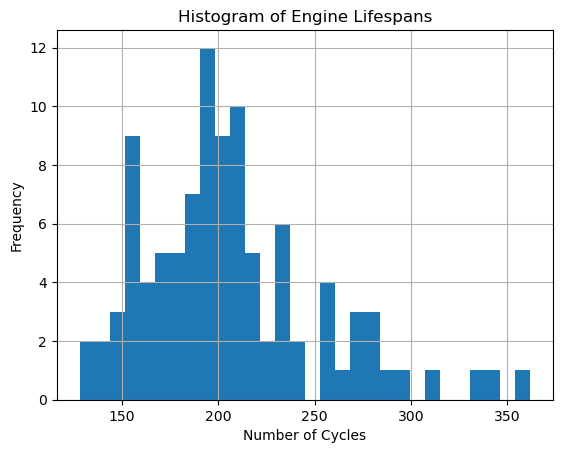

In [25]:
train.groupby('unit_nr')['time_cycles'].max().hist(bins=30)
plt.title("Histogram of Engine Lifespans")
plt.xlabel("Number of Cycles")
plt.ylabel("Frequency")
plt.show()

# 5. Sensor Trend Over Time:

In [ ]:
engine_ids = train['unit_nr'].unique()[:3]
sensor = 'sensor_2'

for eid in engine_ids:
    plt.plot(
        train[train['unit_nr'] == eid]['time_cycles'],
        train[train['unit_nr'] == eid][sensor],
        label=f'Engine {eid}'
    )

plt.title(f"{sensor} over Time")
plt.xlabel("Cycle")
plt.ylabel("Sensor Reading")
plt.legend()
plt.show()


In [ ]:
engine_ids = train['unit_nr'].unique()[:3]
sensor = 'sensor_9'

for eid in engine_ids:
    plt.plot(
        train[train['unit_nr'] == eid]['time_cycles'],
        train[train['unit_nr'] == eid][sensor],
        label=f'Engine {eid}'
    )

plt.title(f"{sensor} over Time")
plt.xlabel("Cycle")
plt.ylabel("Sensor Reading")
plt.legend()
plt.show()


# 6. Compute RUL (Remaining Useful Life):
Remaining Useful Life (RUL) is the number of time cycles an engine has left before it fails.
* If an engine is at cycle 1 out of 100, RUL = 99.

* If it's at cycle 50, RUL = 50.

* If it's at the final cycle (100), RUL = 0.

In [ ]:
def calculate_RUL(df):
    # Get the total number of cycles for each unit
    grouped_by_unit = train.groupby(by="unit_nr")
    max_cycle = grouped_by_unit["time_cycles"].max()

    # Merge the max cycle back into the original frame
    # "Join each row in df with the max_cycle of that unit number."
    result_frame = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='unit_nr', right_index=True)
    
    # Calculate remaining useful life for each row
    remaining_useful_life = result_frame["max_cycle"] - result_frame["time_cycles"]
    result_frame["RUL"] = remaining_useful_life
    
    # drop max_cycle as it's no longer needed
    result_frame = result_frame.drop("max_cycle", axis=1)

    return result_frame

train = calculate_RUL(train)
train[index_names+['RUL']].head()

# 7. Plotting:

In [ ]:
df_max_rul = train[['unit_nr', 'RUL']].groupby('unit_nr').max().reset_index()
df_max_rul['RUL'].hist(bins=15, figsize=(15,7))
plt.xlabel('RUL')
plt.ylabel('frequency')
plt.show()

* X-axis (RUL): The starting Remaining Useful Life of each engine unit.

* Y-axis (frequency): The number of engines (units) that start with that RUL.

* Most engines start with an RUL between 170 and 230 cycles.

* A few engines start with a lower RUL (~130) or higher RUL (300+).

In [ ]:
def plot_sensor(sensor_name):
    plt.figure(figsize=(13,5))
    for i in train['unit_nr'].unique():
        if (i % 10 == 0):  # only plot every 10th unit_nr
            plt.plot('RUL', sensor_name, 
                     data=train[train['unit_nr']==i])
    plt.xlim(250, 0)  # reverse the x-axis so RUL counts down to zero
    plt.xticks(np.arange(0, 275, 25))
    plt.ylabel(sensor_name)
    plt.xlabel('Remaining Use fulLife')
    plt.show()

for sensor_name in sensor_names:
    plot_sensor(sensor_name)

* X-axis: Remaining Useful Life (RUL)

   - It counts down from ~250 to 0 (0 = engine failure).

   - So, we observe the engine getting closer to failure from left to right.

* Y-axis: Sensor values. 

   - Shows how each sensor's value changes as the engine wears out.
 
Based on the plots, sensors 1, 5, 6, 10, 16, 18 and 19 hold no information related to Remaining Useful Life as the sensor values remain constant throughout time.

# 8. Data Preproccessing:

In [ ]:
# drop unwanted columns and split target variable from training set
drop_sensors = ['sensor_1','sensor_5','sensor_6','sensor_10','sensor_16','sensor_18','sensor_19']
drop_labels = index_names+setting_names+drop_sensors

In [ ]:
X_train = train.drop(drop_labels, axis=1)
y_train = X_train.pop('RUL')  # Removes the 'RUL' column from X_train and Returns that column's data to y_train.

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
# Since the true RUL values for the test set are only provided for the last time cycle of each enginge, 
# the test set is subsetted to represent the same
X_test = test.groupby('unit_nr').last().reset_index().drop(drop_labels, axis=1)
X_test

In [ ]:
y_test

# 9. Baseline Prediction Using Random Forest Regressor:

In [ ]:
# create and fit model
# rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# predict and evaluate
y_hat_train = rf_model.predict(X_train)
evaluate(y_train, y_hat_train, 'train')

y_hat_test = rf_model.predict(X_test)
evaluate(y_test, y_hat_test)

The RMSE on the test set is lower. This may be explained because the RUL of the training set contains more samples of high RUL compared to the test set and high RUL does not necessarily correlate with the sensor signals.

* The model’s predictions on the test set have less error (Root Mean Squared Error) than expected.
  At first, this might sound like a good thing.
* The training data has lots of examples where the engine is still healthy (high Remaining Useful Life, like RUL = 150, 200, etc.).
  These engines are far from failing.
* The test set mostly contains engines that are closer to failure (lower RUL, like RUL = 20, 10, 5).
  It doesn’t have many high RUL examples.
* When an engine is healthy (high RUL), the sensor readings often don’t change much.
  So, sensor data doesn’t tell you much when the engine is far from failing.

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(y_test.values, label='Actual RUL', marker='o', linestyle='-', color='blue')
plt.plot(y_hat_test, label='Predicted RUL (RF)', marker='x', linestyle='--', color='green')

plt.xlabel('Engine Index')
plt.ylabel('RUL')
plt.title('Actual vs Predicted RUL - Random Forest')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()